<a href="https://colab.research.google.com/github/mbroda2000/Python_projekt/blob/michal/potwierdzenie%20Hipotezy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/Data_ML.csv')

In [3]:
data.head(100)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,<35,No,Master,1,Woman,No,NotDev,9,2,United States of America,193000.0,Ansible;Docker;Git;AWS;Microsoft SQL Server,5,0
96,96,<35,No,Undergraduate,1,Man,Yes,Dev,9,4,Greece,28536.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Doc...,14,0
97,97,>35,No,Master,1,Man,No,NotDev,4,2,Australia,96874.0,C#;HTML/CSS;Matlab;Python;R;SQL;Git;Django;Fla...,14,0
98,98,>35,No,Undergraduate,1,Man,No,Dev,24,14,United Kingdom of Great Britain and Northern I...,77556.0,Bash/Shell;Java;JavaScript;Node.js;Python;Type...,15,1


In [16]:
import pandas as pd

new_data = data.copy()
new_data = new_data.drop('Unnamed: 0', axis=1)
new_data =new_data.drop('HaveWorkedWith', axis=1) # droping unnessesery datas

# Transformation of 'age'(1-age>35, 0-age<=35)
new_data['Age'] = (data['Age'] == '>35')

# Transformation of 'Accessibility' (1-Yes, 0-No)
new_data['Accessibility'] = (data['Accessibility'] == 'Yes')

# Transformation of 'EdLevel'
ed_level_mapping = {'Master': 1, 'Undergraduate': 2, 'PhD': 3}
new_data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)

# Transformation of 'Employment' (1-employed, 0-not employed)
new_data['Employment'] = (data['Employment'] == 1)

# Transformation of 'Gender'
gender_mapping = {'Man': 1, 'Woman': 2, 'Nonbinary': 0}
new_data['Gender'] = data['Gender'].map(gender_mapping)

# Transformation of'MentalHealth' (1-Yes, 0-No)
new_data['MentalHealth'] = (data['MentalHealth'] == 'Yes')

# Transformation of 'MainBranch'(1-Dev, 0-NotDev)
new_data['MainBranch'] = (data['MainBranch'] == 'Dev')

# Transformation of 'Country'
country_mapping = {country: i + 1 for i, country in enumerate(data['Country'].unique())}
new_data['Country'] = data['Country'].map(country_mapping)


# Transformation of 'Employed'(1-Employed, 0-Not Employed)
new_data['Employed'] = data['Employed']

print(new_data)

         Age  Accessibility  EdLevel  Employment  Gender  MentalHealth  \
0      False          False      1.0        True     1.0         False   
1      False          False      2.0        True     1.0         False   
2      False          False      1.0        True     1.0         False   
3      False          False      2.0        True     1.0         False   
4       True          False      3.0       False     1.0         False   
...      ...            ...      ...         ...     ...           ...   
73457  False          False      2.0        True     1.0         False   
73458   True          False      2.0        True     1.0         False   
73459  False          False      2.0        True     1.0         False   
73460  False           True      2.0        True     1.0          True   
73461  False          False      1.0        True     NaN         False   

       MainBranch  YearsCode  YearsCodePro  Country  PreviousSalary  \
0            True          7            

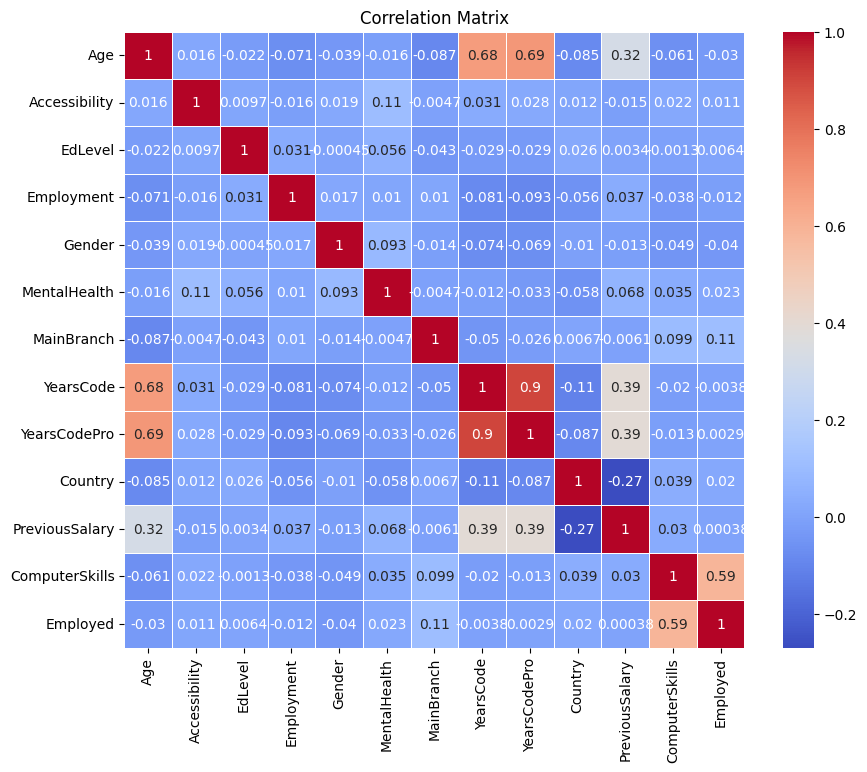

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = new_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [50]:
import pandas as pd

# Załóżmy, że 'new_data' to DataFrame po zastosowaniu wcześniejszych operacji

# Tworzenie nowej tabeli
new_table = pd.DataFrame()

# Kolumny 'YearsCode' i 'YearsCodePro'
new_table['Years Code'] = new_data['YearsCode']
new_table['Years Code Pro'] = new_data['YearsCodePro']

# Kolumna 'Współczynnik między (Years Code Pro / Years Code)'
new_table['Ratio (YearsCodePro / YearsCode)'] =  new_data['YearsCode']-new_data['YearsCodePro']

# Kolumny 'EdLevel', 'MainBranch', 'PreviousSalary', 'Employment' i 'Employed'
new_table['EdLevel'] = new_data['EdLevel']
new_table['Main Branch'] = new_data['MainBranch']
new_table['Previous Salary'] = new_data['PreviousSalary']
new_table['Employment'] = new_data['Employment']
new_table['Employed'] = new_data['Employed']

# Wyświetlenie nowej tabeli
print(new_table)

       Years Code  Years Code Pro  Ratio (YearsCodePro / YearsCode)  EdLevel  \
0               7               4                                 3      1.0   
1              12               5                                 7      2.0   
2              15               6                                 9      1.0   
3               9               6                                 3      2.0   
4              40              30                                10      3.0   
...           ...             ...                               ...      ...   
73457           7               2                                 5      2.0   
73458          21              16                                 5      2.0   
73459           4               3                                 1      2.0   
73460           5               1                                 4      2.0   
73461          10               3                                 7      1.0   

       Main Branch  Previous Salary  Em

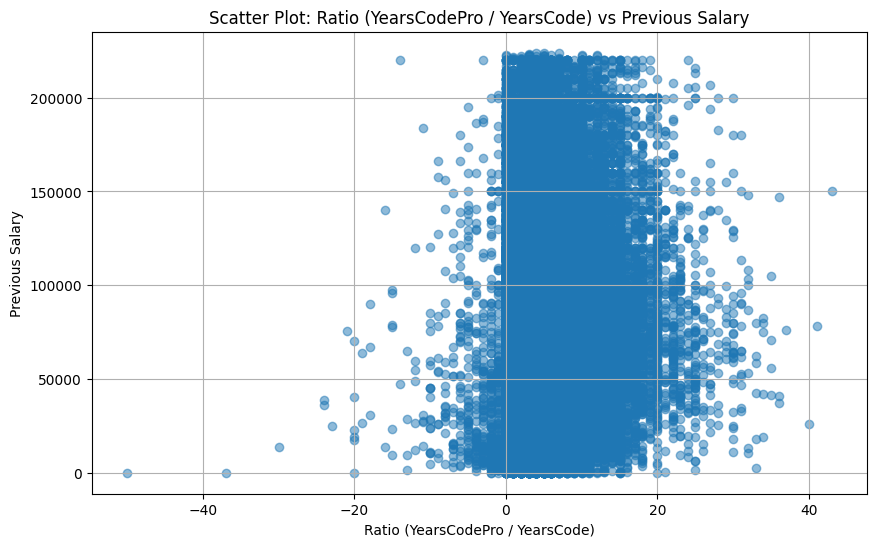

In [51]:
#HYPOTHESIS 1
#People who have favourable YearsCodePro/YearsCode get higher salaries.

import matplotlib.pyplot as plt

# Przykładowe dane - zastąp je danymi z Twojej tabeli
ratio = new_table['Ratio (YearsCodePro / YearsCode)']
previous_salary = new_table['Previous Salary']

# Stworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(ratio, previous_salary, alpha=0.5)
plt.title('Scatter Plot: Ratio (YearsCodePro / YearsCode) vs Previous Salary')
plt.xlabel('Ratio (YearsCodePro / YearsCode)')
plt.ylabel('Previous Salary')
plt.grid(True)

plt.show()

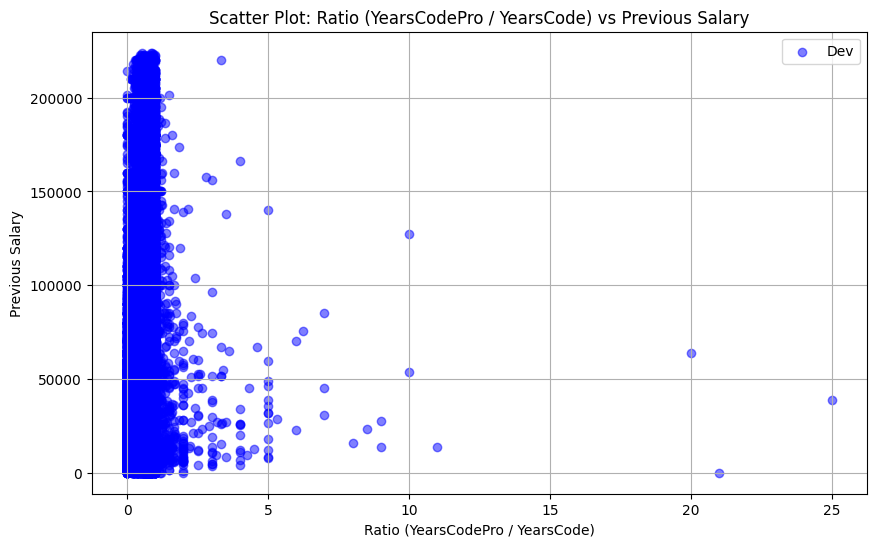

In [29]:
import matplotlib.pyplot as plt

# Przykładowe dane - zastąp je danymi z Twojej tabeli
ratio = new_table['Ratio (YearsCodePro / YearsCode)']
previous_salary = new_table['Previous Salary']
main_branch = new_table['Main Branch']

# Stworzenie wykresu punktowego z podziałem na kategorie
plt.figure(figsize=(10, 6))

# Punkty dla Main Branch == 1 (Dev)
plt.scatter(ratio[main_branch == 1], previous_salary[main_branch == 1], label='Dev', alpha=0.5, color='blue')

# Punkty dla Main Branch == 0 (NotDev)


plt.title('Scatter Plot: Ratio (YearsCodePro / YearsCode) vs Previous Salary')
plt.xlabel('Ratio (YearsCodePro / YearsCode)')
plt.ylabel('Previous Salary')
plt.grid(True)
plt.legend()


plt.show()

In [52]:
import pandas as pd
import numpy as np
# Załóżmy, że 'new_data' to DataFrame po zastosowaniu wcześniejszych operacji

# Tworzenie nowej tabeli
new_table = pd.DataFrame()

# Kolumny 'YearsCode' i 'YearsCodePro'
new_table['Years Code'] = new_data['YearsCode']
new_table['Years Code Pro'] = new_data['YearsCodePro']

# Kolumna 'Współczynnik między (Years Code Pro / Years Code)'
new_table['Ratio (YearsCodePro / YearsCode)'] =  new_data['YearsCode']- new_data['YearsCodePro']

new_table['EdLevel'] = new_data['EdLevel']
new_table['Main Branch'] = new_data['MainBranch']
new_table['Previous Salary'] = new_data['PreviousSalary']
new_table['Employment'] = new_data['Employment']
new_table['Employed'] = new_data['Employed']
resoult = [
    ((new_table['Employed'] == 1) & (new_table['Employment'] == 1)),  # Warunek 1
    ((new_table['Employed'] == 0) & (new_table['Employment'] == 1)),  # Warunek 2
    ((new_table['Employed'] == 1) & (new_table['Employment'] == 0)),
    ((new_table['Employed'] == 0) & (new_table['Employment'] == 0))  # Warunek 3
]
choices = [1, 0, 2, 3]  # Odpowiednie wartości dla warunków 1, 2 i 3

new_table['Zatrudnienie'] = np.select(resoult, choices, default=None)

# Wyświetlenie nowej tabeli
print(new_table)

       Years Code  Years Code Pro  Ratio (YearsCodePro / YearsCode)  EdLevel  \
0               7               4                                 3      1.0   
1              12               5                                 7      2.0   
2              15               6                                 9      1.0   
3               9               6                                 3      2.0   
4              40              30                                10      3.0   
...           ...             ...                               ...      ...   
73457           7               2                                 5      2.0   
73458          21              16                                 5      2.0   
73459           4               3                                 1      2.0   
73460           5               1                                 4      2.0   
73461          10               3                                 7      1.0   

       Main Branch  Previous Salary  Em

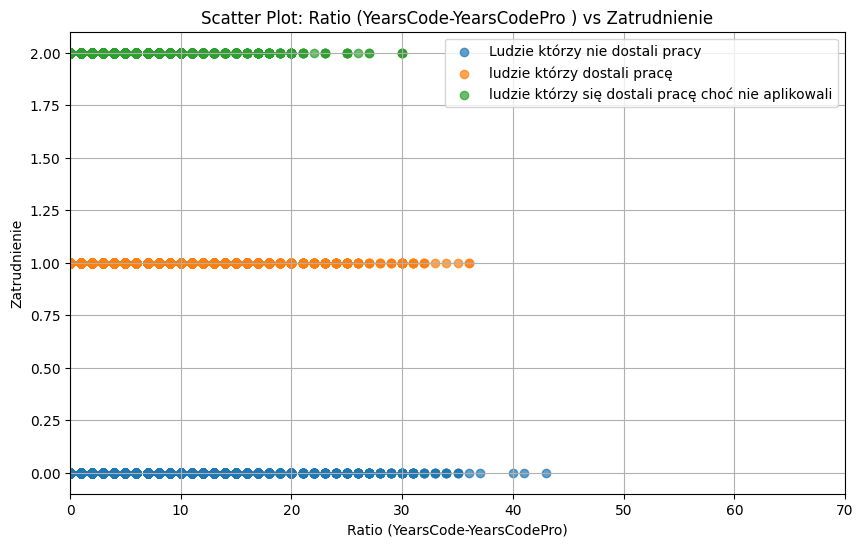

In [64]:
#HYPOTHESIS 2
#People who have favourable YearsCodePro/YearsCode get higher chanse to get job.

import matplotlib.pyplot as plt

# Przykładowe dane - zastąp je danymi z Twojej tabeli
zatrudnienie = new_table['Zatrudnienie']
ratio = new_table['Ratio (YearsCodePro / YearsCode)']

# Stworzenie wykresu punktowego
plt.figure(figsize=(10, 6))

# Punkty dla Zatrudnienie=0
plt.scatter(ratio[zatrudnienie == 0], zatrudnienie[zatrudnienie == 0], label='Ludzie którzy nie dostali pracy', alpha=0.7)

# Punkty dla Zatrudnienie=1
plt.scatter(ratio[zatrudnienie == 1], zatrudnienie[zatrudnienie == 1], label='ludzie którzy dostali pracę', alpha=0.7)

# Punkty dla Zatrudnienie=2
plt.scatter(ratio[zatrudnienie == 2], zatrudnienie[zatrudnienie == 2], label='ludzie którzy się dostali pracę choć nie aplikowali', alpha=0.7)

plt.title('Scatter Plot: Ratio (YearsCode-YearsCodePro ) vs Zatrudnienie')
plt.xlabel('Ratio (YearsCode-YearsCodePro)')
plt.ylabel('Zatrudnienie')
plt.legend()
plt.xlim(0, 70)
plt.legend(loc='upper right')
plt.grid(True)

plt.show()